In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Homework #3 $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer 

In [2]:
# References for pandas

# data: {ndarray, dataframe} of shape (569, 30)
# This is the data matrix. If as_frame=True, data will be a pandas DataFrame.

# target: {ndarray, Series} of shape (569,)
# This is the classification target. If as_frame=True, target will be a pandas Series.


In [3]:
# For a range in N, when N = 1, 2, ..., K calculate a PCA and return 
# I want this to be able to graph the number N pricipal components that maximizes the accuracy. 

def pca_iterations(K,data,target):
    pca = PCA(n_components = K) 
    principalComponents = pca.fit_transform(data) 
    principalDf = pd.DataFrame(data = principalComponents) # The columns of this will be numbered 0 to K-1 
    finalDF = pd.concat([principalDf, breast_dataset[['targets']]], axis = 1)
        
    return finalDF        

In [4]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 1  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [5]:
# Import the breast cancer dataset into python
breast = load_breast_cancer() 

In [6]:
# Extract data from 'breast' 
breast_data = breast.data 
breast_labels = breast.target
features = breast.feature_names 

# Show the shapes of things
print("Shape of 'breast_data':",breast_data.shape)
print("Shape of 'features':",features.shape)
print("Shape of 'breast_labels':",breast_labels.shape)

Shape of 'breast_data': (569, 30)
Shape of 'features': (30,)
Shape of 'breast_labels': (569,)


In [7]:
# Reshape 'breast_labels' into a column vector
targets = np.reshape(breast_labels,(569,1)) 

print("Shape of 'targets':",targets.shape)
print("First 5 terms:",targets[:5])

Shape of 'targets': (569, 1)
First 5 terms: [[0]
 [0]
 [0]
 [0]
 [0]]


In [8]:
# Creates dataframe from 'breast_data'
breast_input = pd.DataFrame(breast_data)

# '.describe' can be used with objects within '.DataFrame'
# breast_input.describe 

In [9]:
# Create a new dataset called 'final_breast_data' by adding the 
# column 'targets' to the end of 'breast_data'
final_breast_data = np.concatenate([breast_data,targets],axis=1)

# shape of 'final_breast_data'
final_breast_data.shape 

(569, 31)

In [10]:
# Create a new dataframe called 'breast_dataset' from 'final_breast_data'
breast_dataset = pd.DataFrame(final_breast_data)

In [11]:
# Name all of the features in breast_dataset
features_labels = np.append(features,'targets') 
breast_dataset.columns = features_labels 

In [12]:
breast_dataset[: 5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
# This creates arrays to be used with machine learning algorithm
X = breast_dataset.loc[:, features].values 
Y = breast_dataset.loc[:, ['targets']].values

# Reshape Y to be an array instead of a column vector. This is for logistic regression
Y_array = Y.reshape(569,)

print("X shape: ", X.shape,"X values: ", X[: 1])
print("Y shape:", Y_array.shape,"Y values:",Y_array[: 5])

X shape:  (569, 30) X values:  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
Y shape: (569,) Y values: [0. 0. 0. 0. 0.]


In [14]:
# Split the datasets into training/test groups. In this case, an 80/20% split was used. 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0) 

In [15]:
# Feature Scaling. MinMax scaling was used prior to running logistic regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

#sc_X = StandardScaler() 
sc_X = MinMaxScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [16]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
print("Max iterations: ",classifier.max_iter)

classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test) 
print("Y_pred shape:",Y_pred.shape)
print("Actual results:",Y_test[0:5])
print("Predicted results:",Y_pred[0:5])

Max iterations:  100
Y_pred shape: (114,)
Actual results: [0. 1. 1. 1. 1.]
Predicted results: [0. 1. 1. 1. 1.]


In [17]:
# Import and create a confusion matrix to compare 'Y_pred' to 'Y_test'
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

In [18]:
#Accuracy, Precision, Recall for Logistic Regression

from sklearn import metrics 

print("Accuracy: ",round(metrics.accuracy_score(Y_test, Y_pred)*100,2),"%")
print("Precision:",round(metrics.precision_score(Y_test, Y_pred)*100,2),"%") 
print("Recall:",round(metrics.recall_score(Y_test, Y_pred)*100,2),"%") 

Accuracy:  96.49 %
Precision: 94.37 %
Recall: 100.0 %


Text(0.5, 257.44, 'Predicted label')

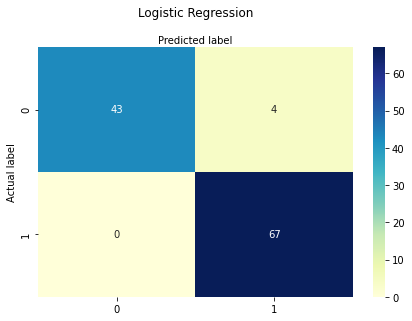

In [19]:
# Plotting Confusion Matrix Heatmap

import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [20]:
# How do I show loss and classification accuracy over iterations?

Conclusion:

When a MinMax scaler was used to pre-process the data, logistic regression had excellent results. 
I was not sure how to plot loss and classification accuracy over iterations in this problem. I think 
That I need to know more about how the Logistic Regression algorithm works first. 

In [21]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 2: PCA feature extraction  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [22]:
# Before beginning PCA, we want to standardize all of the feature samples

from sklearn.preprocessing import StandardScaler 

# Separating out the features  
x = breast_dataset.loc[:, features].values 

# Separating out the target 
y = breast_dataset.loc[:, ['targets']].values

# Standardizing the features array in 'breast_dataset'
x = StandardScaler().fit_transform(x) 

In [23]:
# Run the PCA, in this case make n_components = 2. Do this for different values of n_components 
# Possibly create a function that does this?

from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents) # , columns = ['principal component 1', 'principal component 2']) 
print(principalDf[: 5])

          0          1
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072


In [24]:
# concatonate principalDf and the 'targets' column
finalDF = pd.concat([principalDf, breast_dataset[['targets']]], axis = 1)

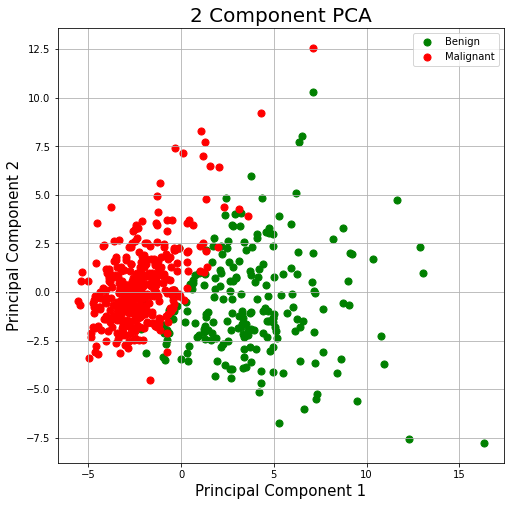

In [25]:
# This is a plot of the principal components and colored to show
# Where the Benign and Malignant cases show up

fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 

labels = [0,1] 
colors = ['g', 'r','b'] 

# What does this do? What is zip?
for labels, color in zip(labels,colors): 
    
    indicesToKeep = finalDF['targets'] == labels
    ax.scatter(finalDF.loc[indicesToKeep, 0] 
               , finalDF.loc[indicesToKeep, 1] 
               , c = color 
               , s = 50) 
ax.legend(["Benign","Malignant"]) 
ax.grid() 

In [26]:
# Problem Statement: Identify the optimum number of K, principleComponents that achieve the highest classification accuracy. 
#                    Plot your classification accuracy,precision, and recall over a different number of K's.

In [27]:
# Defining a max Value of K we want plotted
upperK = 15

In [28]:
# for loop to calculate the accuracy, precision, and recall for multiple values of K

accuracy = np.zeros(upperK)
precision = np.zeros(upperK)
recall = np.zeros(upperK)

for h in range(2,upperK+1):
    a_list1 = list(range(0,h))
    K1 = pca_iterations(h,x,y)
    #print(K1)
    #print("a_list: ",a_list1)
    X = K1.loc[:, a_list1].values 
    Y = K1.loc[:, ['targets']].values
    Y_array = Y.reshape(569,)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0)
    classifier.fit(X_train, Y_train) 
    Y_pred = classifier.predict(X_test) 
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    
    accuracy[h-2] = round(metrics.accuracy_score(Y_test, Y_pred)*100,1)
    precision[h-2] = round(metrics.precision_score(Y_test, Y_pred)*100,2)
    recall[h-2] = round(metrics.recall_score(Y_test, Y_pred)*100,2)

print("Accuracy Length:",len(accuracy),",",accuracy)
print(" ")
print("Precision Length:",len(precision),",",precision)
print(" ")
print("Recall Length:",len(recall),",",recall)

Accuracy Length: 15 , [93.  91.2 94.7 95.6 95.6 95.6 95.6 94.7 94.7 96.5 96.5 96.5 96.5 96.5
  0. ]
 
Precision Length: 15 , [96.83 93.85 95.52 95.59 95.59 95.59 95.59 95.52 95.52 97.01 97.01 97.01
 97.01 97.01  0.  ]
 
Recall Length: 15 , [91.04 91.04 95.52 97.01 97.01 97.01 97.01 95.52 95.52 97.01 97.01 97.01
 97.01 97.01  0.  ]


# The highest values for each of the metrics are:
# Accuracy = 96.5%
# Precision = 97.01%
# Recall = 97.01%

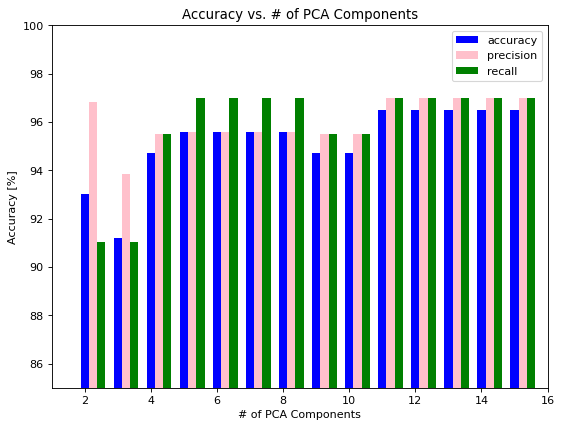

In [29]:
# This plots accuracy over multiple # of PCA component. It seems the minimum amount of PCA 
# components needed to obtain a good accuracy is 12. When a higher value of upperK is used
# the results do not get any better.

yes = np.arange(upperK)
for i in range(len(yes)):
    yes[i] = yes[i] + 2

width = 0.25       
# plt.bar(ind, men_means, width, label='Men')
# plt.bar(ind + width, women_means, width, label='Women')    

figure(figsize=(8, 6), dpi=80)
plt.bar(yes, accuracy, color='blue',width=0.25, label = "accuracy")
plt.bar(yes+width, precision, color='pink',width=0.25, label = "precision")
plt.bar(yes+width+width, recall, color='green',width=0.25, label = "recall")

plt.xlabel("# of PCA Components")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy vs. # of PCA Components")
plt.axis([1, upperK+1, 85, 100])
plt.legend(loc='best')
plt.show()

Conclusion:

Creating the algorithm to display the accuracy, precision, and recall together
took a while to create. If it is correct, it tells us how transforming
the original matrix to a K dimensions will affect model performance. Logistic 
regression using all features, and pre-processed using the MinMax scaler
seems to outperform this model. 

In [30]:
#$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 3: LDA feature extraction  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

In [32]:
breast_data = breast.data 
breast_labels = breast.target

print(breast_data.shape)
print(breast_labels.shape)

(569, 30)
(569,)


In [33]:
#Fitting LDA to breast dataset: 
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(breast_data,breast_labels) 
#Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
print("Shape of LDA:",lda_t.shape," ",lda_t[: 5])

Shape of LDA: (569, 1)   [[3.32392717]
 [2.31910801]
 [3.74742484]
 [4.04854946]
 [2.28115767]]


In [34]:
# Run Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
prediction = classifier.predict(X_test)

In [35]:
# Create a confusion matrix and then print out the Accuracy, Precision, and Recall 
# after completing a Bayes Classifier

cnf_matrix = confusion_matrix(Y_test,prediction)
print("Accuracy:",round(metrics.accuracy_score(Y_test,prediction)*100,2))
print("Precision:",round(metrics.precision_score(Y_test,prediction)*100,2))
print("Recall:",round(metrics.recall_score(Y_test,prediction)*100,2))

Accuracy: 90.35
Precision: 90.0
Recall: 94.03


Text(0.5, 257.44, 'Predicted label')

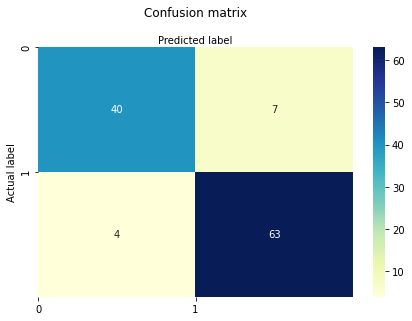

In [36]:
class_names=[0,1]
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Conclusion:

Not sure why this is, but I cannot run the LDA with n_components > 1 for some reason.
The accuracy, precision, and recall while using LDA in conjunction with a Bayes classifier
was a bit lower that the PCA and even regular logistic regression. I believe that the key to possibly 
getting better results here is to understand how you can change the n_components to something 
other than 1. 